<font color = green >

# Decision Trees
</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

<font color = green >

## Iris dataset 
</font>

In [3]:
# Don't install graphviz with the help of pip, use conda install  graphviz
# !pip install graphviz

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
# Note: In case of RuntimeError "Make sure the Graphviz executables are on your system's path” after installing Graphviz 
# helps on mac:  brew install graphviz
# helps on windows:  import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

In [5]:
iris= load_iris()

iris = load_iris()
X, y, features, labels = iris.data, iris.target,iris.feature_names ,iris.target_names

print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)
print ('features:', features)
dict_names = {i:v for i,v in enumerate(labels)}
print ('target names :', dict_names)

X.shape=  (150, 4)
y.shape=  (150,)
X_train.shape=  (112, 4)
X_test.shape=  (38, 4)
y_train.shape=  (112,)
y_test.shape=  (38,)
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names : {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


<font color = green >

## Learning the model
</font>

In [6]:
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 98.214%
test accuracy= 97.368%


<font color = green >

## Vizualize the decision tree  graph 
</font>

In [7]:
# fn=  os.path.join(path , 'restricted_depth.gv')
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

'Source.gv.pdf'

#### Note: Most issues with `graphviz` appear in case of installing it with the help of `pip`.
You may try to use the conda environment and install `graph_viz` by command `conda install graphviz`



#### Should appear the followingf image in separate window 

<img src = "data/decision_tree_graph.jpg" height=500 width= 500 align="left">

<div style="clear:left;"></div>
<br><br><br><br><br><br><br><br>


<font color = green >

## Feature importance
</font>

In [8]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)

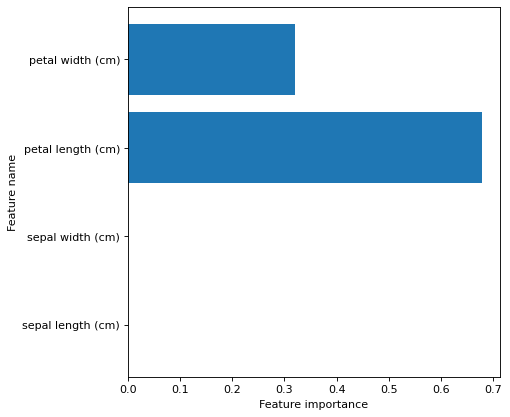

In [9]:
plot_feature_importances(clf, features)

<font color = green >

## Auxiliary drawing functions 
</font>

In [10]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True, title_size= None):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
 
   
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    
    fontdict={'fontsize': title_size} if title_size else None
    
    plt.title(title, fontdict)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)

    
def plot_multi_class_logistic_regression(X,y,dict_names=None, colors= None,  title =None):
    '''
    Draw the multi class samples of 2 features
    :param X: X 2 ndarray (m,2),
    :param y: vector (m,)
    :param dict_names: dict of values of y and names
    :return: None
    '''
    if not colors:
        colors_for_points = ['green','grey', 'orange', 'brown']
    else:
         colors_for_points = colors

    y_unique = list(set(y))

    for i in range (len(y_unique)):
        ind = y == y_unique[i] # vector

        if dict_names:
            plt.scatter(X[ind,0], X[ind,1], c=colors_for_points[i], s=40, label=dict_names[y_unique[i]],edgecolor='black', alpha=.7)
        else:
            plt.scatter(X[ind, 0], X[ind, 1], s=40, c=colors_for_points [i], edgecolor = 'black', alpha = 0.7)
    if title:
        plt.title(title)

    if dict_names:
        plt.legend(frameon=True)
        


<font color = green >

## Synthetic dataset
</font>

In [11]:
from sklearn.datasets import make_blobs

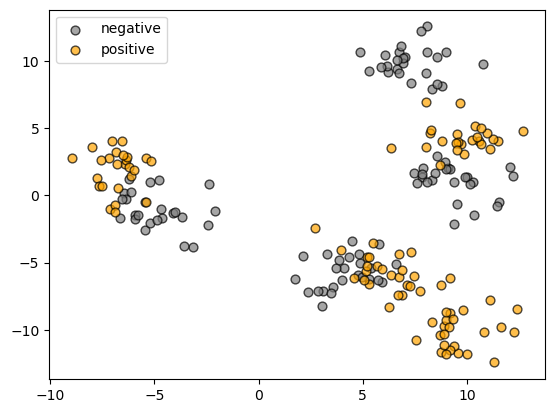

In [12]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y
                       cluster_std = 1.3, random_state = 4)
X_train = X_mk8
y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]
plt.figure()
plot_data_logistic_regression(X_mk8,y_train)


Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


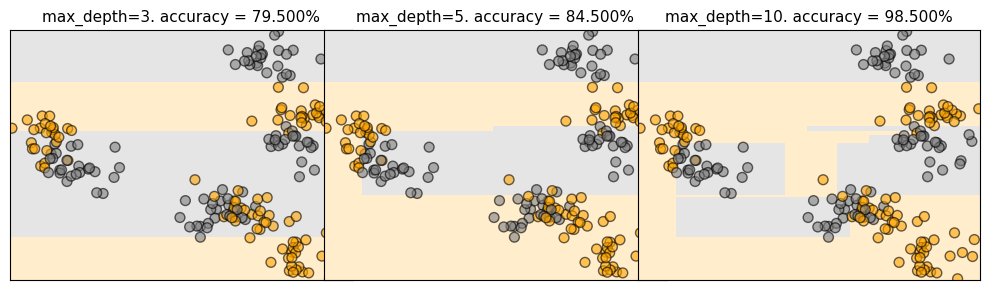

In [13]:
plt.figure(figsize= (10,3))
max_depths= [3,5,10]    

for i, max_depth in enumerate(max_depths):
    ax = plt.subplot(1,len(max_depths),i+1)
    clf = DecisionTreeClassifier(
        criterion=  'entropy',
        random_state=20,        
        max_depth=max_depth,    
    #     max_leaf_nodes=4,
    ).fit(X_train, y_train)
    accuracy = clf.score (X_train, y_train)
#     print("train accuracy= {:.3%}".format(accuracy))
    plot_decision_boundary(
        clf,
        X_train,
        y_train,
        precision= 0.05,
        ax=ax,
        title = 'max_depth={}. accuracy = {:.3%}'.format(max_depth, accuracy),
        is_extended= False,
        title_size= 11,)
    
plt.tight_layout (w_pad=-2)


# max_depth=5    
# clf = DecisionTreeClassifier(
#     criterion=  'entropy',
#     random_state=20,        
#     max_depth=max_depth,    
# #     max_leaf_nodes=4,
# ).fit(X_train, y_train)
# accuracy = clf.score (X_train, y_train)
# print("train accuracy= {:.3%}".format(accuracy))
# plt.figure()

# plot_decision_boundary(clf, X_train, y_train, precision= 0.05, title = 'max_depth={}. accuracy = {:.3%}'.format(max_depth, accuracy))


In [15]:
graph_viz = tree.export_graphviz(clf, out_file=None,filled = True)
graph = graphviz.Source(graph_viz)
graph.view("homework_10\Source.gv.pdf", cleanup =True) # cleanup (bool) – Delete the source file after rendering.

'homework_10\\Source.gv.pdf.pdf'

#### Should appear the followingf image in separate window 

<img src = "data/decision_tree_graph2.jpg" height=500 width= 500 align="left">

<div style="clear:left;"></div>
<br><br><br><br><br><br><br><br>


<font color = green >

## Tennis dataset

</font>

In [16]:
import os
import pandas as pd
cwd= os.getcwd() # current working directory
# path = os.path.join(cwd,'data')
# fn=  os.path.join(path , 'tennis.csv')
fn=  'data/tennis.csv'
df = pd.read_csv(fn)
del df['temp']
print (df.head())

X_train = df.iloc[:, :3].values
y_train = df.iloc[:, 3].values
print ('\nX_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)

    outlook humidity   wind play
0     sunny     high  False   no
1     sunny     high   True   no
2  overcast     high  False  yes
3     rainy     high  False  yes
4     rainy   normal  False  yes

X_train.shape=  (14, 3)
y_train.shape=  (14,)


In [17]:
from sklearn.preprocessing  import LabelEncoder

In [18]:
X_train_cat = X_train.copy()
le = LabelEncoder()
for i in range(X_train.shape[1]):
    X_train_cat[:,i]= le.fit_transform(X_train[:,i])
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    print ('{}: {}'.format(list(df)[i], le_dict))
y_train_cat= le.fit_transform(y_train)
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print ('y: ', le_dict)
print ('X_train_cat.shape= ',X_train_cat.shape)
print ('y_train_cat.shape= ',y_train_cat.shape)
X_train_cat

outlook: {'overcast': 0, 'rainy': 1, 'sunny': 2}
humidity: {'high': 0, 'normal': 1}
wind: {False: 0, True: 1}
y:  {'no': 0, 'yes': 1}
X_train_cat.shape=  (14, 3)
y_train_cat.shape=  (14,)


array([[2, 0, 0],
       [2, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 1],
       [2, 0, 0],
       [2, 1, 0],
       [1, 1, 0],
       [2, 1, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=object)

In [19]:
max_depth = None
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train_cat, y_train_cat)
features = list(df)[:3]
labels = ['No','Yes']
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

'Source.gv.pdf'

#### Should appear the followingf image in separate window 

<img src = "data/decision_tree_graph3.jpg" height=500 width= 500 align="left">

<div style="clear:left;"></div>
<br><br><br><br><br><br><br><br>


<font color = green>

#  Random Forests

</font>



In [20]:
from sklearn.ensemble import RandomForestClassifier

<font color = green>

## Iris dataset

</font>



In [21]:
iris = load_iris()
X, y, features, labels = iris.data, iris.target,iris.feature_names ,iris.target_names

print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)
print ('features:', features)
dict_names = {i:v for i,v in enumerate(labels)}
print ('target names :', dict_names)

X.shape=  (150, 4)
y.shape=  (150,)
X_train.shape=  (112, 4)
X_test.shape=  (38, 4)
y_train.shape=  (112,)
y_test.shape=  (38,)
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names : {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [22]:
clf = RandomForestClassifier().fit (X_train, y_train)
clf.score (X_train, y_train)
n_estimators_list= [5,10,20]
max_features_list= list(np.arange(1, X_train.shape[1]+1))

for i in range (len(n_estimators_list)): 
    for j in range (len(max_features_list)):
        index = len(max_features_list)*i+j           
        clf = RandomForestClassifier(
            random_state=10,
            n_estimators= n_estimators_list[i],
            max_features=max_features_list[j],        
        ).fit(X_train, y_train)
        accuracy_train = clf.score (X_train, y_train)
        accuracy_test = clf.score (X_test, y_test)
        print ('n_estimators= {}, max_features = {}, accuracy_train = {:.3%}, accuracy_test = {:.3%}'.format (
            n_estimators_list[i],max_features_list[j], accuracy_train, accuracy_test))

print ('Comparing  to desicion tree clf')
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
        

n_estimators= 5, max_features = 1, accuracy_train = 98.214%, accuracy_test = 94.737%
n_estimators= 5, max_features = 2, accuracy_train = 98.214%, accuracy_test = 94.737%
n_estimators= 5, max_features = 3, accuracy_train = 98.214%, accuracy_test = 94.737%
n_estimators= 5, max_features = 4, accuracy_train = 98.214%, accuracy_test = 94.737%
n_estimators= 10, max_features = 1, accuracy_train = 100.000%, accuracy_test = 94.737%
n_estimators= 10, max_features = 2, accuracy_train = 100.000%, accuracy_test = 97.368%
n_estimators= 10, max_features = 3, accuracy_train = 100.000%, accuracy_test = 94.737%
n_estimators= 10, max_features = 4, accuracy_train = 100.000%, accuracy_test = 94.737%
n_estimators= 20, max_features = 1, accuracy_train = 100.000%, accuracy_test = 94.737%
n_estimators= 20, max_features = 2, accuracy_train = 100.000%, accuracy_test = 97.368%
n_estimators= 20, max_features = 3, accuracy_train = 100.000%, accuracy_test = 97.368%
n_estimators= 20, max_features = 4, accuracy_train 

In [23]:
# Conclusion: this dataset is not good to demonstrate the power of random forest 

<font color = green>

## Mushrooms dataset

</font>



In [24]:
import os
import pandas as pd
cwd= os.getcwd() # current working directory
# path = os.path.join(cwd,'data')
# fn=  os.path.join(path , 'mushrooms.csv')
fn= 'data/mushrooms.csv'
# https://www.kaggle.com/ymotonskillupai/mushroomscsv
df = pd.read_csv(fn)

print (list(df))
X = df.iloc[:, 1:].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print ('\nX_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
df.head()

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

X_train.shape=  (6093, 22)
y_train.shape=  (6093,)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()
le = LabelEncoder()
for i in range(X_train.shape[1]):
    X_train_cat[:,i]= le.fit_transform(X_train[:,i])
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    print (X_test[:,i])
    X_test_cat[:,i] = le.transform(X_test[:,i])
y_train_cat= le.fit_transform(y_train)
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print ('y: ', le_dict)
y_test_cat= le.transform(y_test)
print ('X_train_cat.shape= ',X_train_cat.shape)
print ('y_train_cat.shape= ',y_train_cat.shape)
X_train_cat

['x' 'f' 'x' ... 'x' 'x' 'k']
['y' 'y' 'y' ... 'y' 's' 's']
['n' 'g' 'y' ... 'e' 'y' 'n']
['t' 't' 't' ... 'f' 't' 'f']
['p' 'n' 'a' ... 's' 'l' 'n']
['f' 'f' 'f' ... 'f' 'f' 'a']
['c' 'c' 'c' ... 'c' 'c' 'c']
['n' 'b' 'b' ... 'n' 'b' 'b']
['p' 'p' 'k' ... 'b' 'k' 'y']
['e' 't' 'e' ... 't' 'e' 'e']
['e' 'b' 'c' ... '?' 'c' '?']
['s' 's' 's' ... 's' 's' 's']
['s' 's' 's' ... 'k' 's' 's']
['w' 'g' 'w' ... 'p' 'w' 'o']
['w' 'g' 'w' ... 'p' 'w' 'o']
['p' 'p' 'p' ... 'p' 'p' 'p']
['w' 'w' 'w' ... 'w' 'w' 'n']
['o' 'o' 'o' ... 'o' 'o' 'o']
['p' 'p' 'p' ... 'e' 'p' 'p']
['k' 'k' 'n' ... 'w' 'k' 'b']
['s' 'y' 'n' ... 'v' 's' 'c']
['u' 'd' 'm' ... 'd' 'g' 'l']
y:  {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
X_train_cat.shape=  (6093, 22)
y_train_cat.shape=  (6093,)


array([[2, 3, 9, ..., 1, 5, 1],
       [5, 3, 4, ..., 3, 5, 1],
       [2, 2, 3, ..., 2, 0, 1],
       ...,
       [5, 2, 3, ..., 3, 3, 1],
       [2, 0, 4, ..., 3, 4, 0],
       [5, 3, 3, ..., 3, 5, 0]], dtype=object)

In [26]:
max_features_list = [20,12, 10,8,6,4,3,2,1]    
for i, max_features in enumerate(max_features_list):
    clf = RandomForestClassifier(
        random_state=0,        
        max_features= max_features,    
    ).fit(X_train_cat, y_train_cat)
    accuracy_train = clf.score(X_train_cat, y_train_cat)
    accuracy_test = clf.score(X_test_cat, y_test_cat)
    print ('max_features = {}:\n\t accuracy_train = {:.3%}\n\t accuracy_test = {:.3%}'.format (
        max_features_list[i], accuracy_train, accuracy_test))

max_features = 20:
	 accuracy_train = 100.000%
	 accuracy_test = 100.000%
max_features = 12:
	 accuracy_train = 100.000%
	 accuracy_test = 100.000%
max_features = 10:
	 accuracy_train = 100.000%
	 accuracy_test = 100.000%
max_features = 8:
	 accuracy_train = 100.000%
	 accuracy_test = 100.000%
max_features = 6:
	 accuracy_train = 100.000%
	 accuracy_test = 100.000%
max_features = 4:
	 accuracy_train = 100.000%
	 accuracy_test = 99.951%
max_features = 3:
	 accuracy_train = 100.000%
	 accuracy_test = 99.754%
max_features = 2:
	 accuracy_train = 100.000%
	 accuracy_test = 99.606%
max_features = 1:
	 accuracy_train = 100.000%
	 accuracy_test = 99.360%


In [27]:
print ('Comparing  to desicion tree clf')
max_depth = None
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=0,        
    max_depth=max_depth,    
).fit(X_train_cat, y_train_cat)
print("train accuracy= {:.3%}".format(clf.score (X_train_cat, y_train_cat)))
print("test accuracy= {:.3%}".format(clf.score (X_test_cat, y_test_cat)))        

Comparing  to desicion tree clf
train accuracy= 100.000%
test accuracy= 100.000%


In [ ]:
# Conclusion: this dataset is also  not good to demonstrate the power of random forest :)

<font color = green >

# Gradient boosting decision tree
</font>

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

<font color = green>

## Fruits dataset 2D

</font>



In [29]:
import os
cwd= os.getcwd() 
path = os.path.join(cwd,'data')
fn=  os.path.join(path , 'fruit_data_with_colors.txt')
df_fruits = pd.read_table(fn)
df_fruits.head(10)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [30]:
def plot_decision_boundary_universal(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =None):
    '''
    expected to be universal for binary and multiclass classification but not tested for binary 
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_areas= colors_for_points =  np.array(['green','grey', 'orange', 'brown'])
    cmap_light = ListedColormap(colors_for_areas)

    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    if precision<0.05:
        print ('Calling to predict for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape
    Z = Z.reshape(xx1.shape)

    if ax:
        plt.sca(ax)

    # Plot all meshgrid prediction
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size,
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size,
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        
        # Create legend
        if labels is None:
            labels= ['negative','positive'] # assume this is for binary or for muticlass with labels 
        import matplotlib.patches as mpatches # use to assign lavels for colored points
        patches= [mpatches.Patch(color=colors_for_points[i], label=labels[i]) for i in range (len(labels))]
        plt.legend(handles=patches)
        if features is None:
            plt.xlabel('feature 1')
            plt.ylabel('feature 2')
        else: 
            plt.xlabel(features[0])
            plt.ylabel(features[1])

    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False,
        labelbottom = False
        )
    plt.title(title)


X_train.shape=  (44, 2)
X_test.shape=  (15, 2)
y_train.shape=  (44,)
y_test.shape=  (15,)
target names : {0: 'apple', 1: 'mandarin', 2: 'orange', 3: 'lemon'}


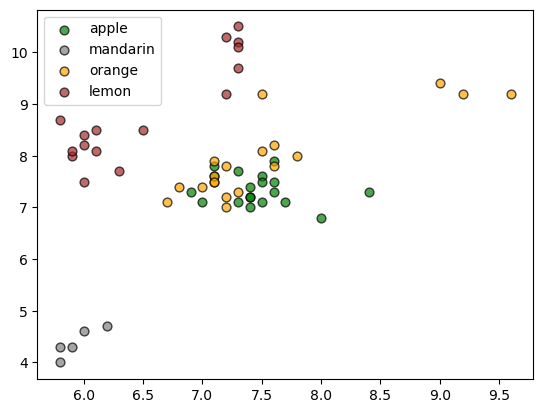

In [31]:
features = ['width', 'height']
X = df_fruits[features].values
y = df_fruits['fruit_label'].values -1  # shift due to labels of fruits are from 1 

df_fruits.head(20)
# labels =  df_fruits['fruit_name'].unique()
fruits_dict = dict(zip(np.unique(y), df_fruits['fruit_name'].unique()))

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)

print ('target names :', fruits_dict)

plt.figure()
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)


train accuracy= 95.455%
test accuracy= 80.000%


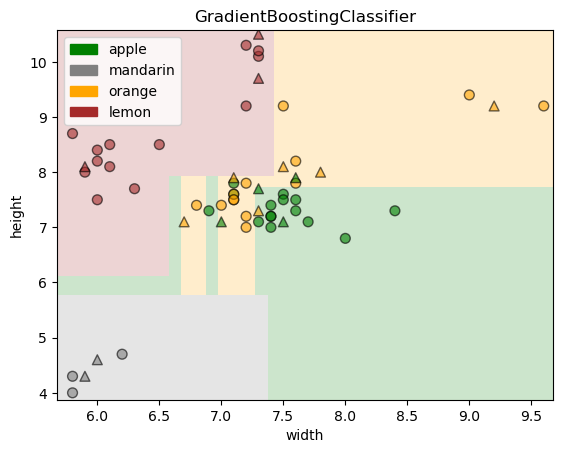

In [32]:
plt.figure ()
labels =list(fruits_dict.values())

clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=3).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
plot_decision_boundary_universal(clf, X_train, y_train, X_test, y_test, title='GradientBoostingClassifier', precision=0.05, labels= labels, features = features)


---

<font color = green>

##  XGBoost
</font>



In [33]:
from xgboost import XGBClassifier

clf_xgboost = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss')
clf_xgboost.fit(X_train, y_train)
print('\nAccuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_xgboost.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_xgboost.score(X_test, y_test)))




Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.60


In [34]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, XGBClassifierMixIn, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at n

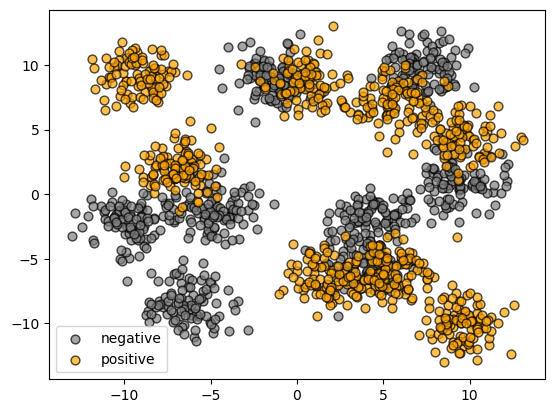

In [35]:
X_mk8, y_mk8 = make_blobs(n_samples = 2000, n_features = 2, centers = 16, # centers impacts for y
                       cluster_std = 1.3, random_state = 4)
X = X_mk8
y = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
plt.figure()
plot_data_logistic_regression(X_train,y_train)



In [36]:
print ('\n','='*20, '\nDecisionTreeClassifier')
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=0,        
    max_depth=max_depth,    
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

print ('\n','='*20, '\nRandomForestClassifier')
clf = RandomForestClassifier(
    random_state=10,
    n_estimators=10,
    max_features=2,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

print ('\n','='*20, '\nGradientBoostingClassifier')
clf = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

print ('\n','='*20, '\nXGBClassifier')
clf = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss',reg_lambda= 100 , max_depth =7)
clf.fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))



DecisionTreeClassifier
train accuracy= 100.000%
test accuracy= 81.600%

RandomForestClassifier
train accuracy= 98.800%
test accuracy= 82.000%

GradientBoostingClassifier
train accuracy= 87.467%
test accuracy= 83.200%

XGBClassifier
train accuracy= 91.000%
test accuracy= 84.600%


<font color = green >
    
# Home Task 

</font>



<font color = green>

##  Brest cancer  dataset
</font>



In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print ('labels:',labels)
print ('features:', features)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<font color = green>

##  DecisionTree 

</font>



In [54]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = DecisionTreeClassifier(
    criterion= 'log_loss',
    random_state=0,        
).fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

train accuracy= 100.000%
test accuracy= 95.804%


'Source.gv.pdf'

<font color = green>

##  RandomForest

</font>



In [53]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = RandomForestClassifier(
    n_estimators=10,
    max_features=2,
    random_state=0,
).fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 99.531%
test accuracy= 96.503%


<font color = green>

##  Gradient Boosting Decision Trees (GBDT)

</font>



In [52]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=2
).fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 97.418%
test accuracy= 96.503%


<font color = green>

##  XGBoost

</font>



In [51]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = XGBClassifier(
    use_label_encoder=False, 
    eval_metric= 'logloss',
    reg_lambda= 100 , 
    max_depth =4
).fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 99.296%
test accuracy= 98.601%
